In [1]:
import numpy as np
import time
import pandas as pd

import cv2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datasets = ['data/fdata1','data/fdata2','data/fdata3','data/fdata4']

In [4]:
import os

data0 = []
for dataset in datasets:
    metadata = os.path.join(dataset, 'fdata.csv')
    pic_path = os.path.join(dataset, 'pic')
    df = pd.read_csv(metadata, names=['name','state'])
    df['name'] = [os.path.join(pic_path, pic) for pic in df['name']]
    
    data0.append(df)

In [5]:
# join into one
joined_data = pd.concat(data0)
joined_data.head()
joined_data.to_csv('full_data.csv', index=False)

In [6]:
num_class = len(joined_data['state'].unique())
ges_to_num = dict({(g,i) for i, g in enumerate(joined_data['state'].unique())})
num_to_ges = dict({(i,g) for i, g in enumerate(joined_data['state'].unique())})
num_class, ges_to_num

(30,
 {' l1': 5,
  ' l2': 6,
  ' l3': 7,
  ' l4': 8,
  ' l5': 9,
  ' lc': 0,
  ' le': 4,
  ' lo': 1,
  ' lq': 2,
  ' lw': 3,
  ' m1': 15,
  ' m2': 16,
  ' m3': 17,
  ' m4': 18,
  ' m5': 19,
  ' mc': 10,
  ' me': 14,
  ' mo': 11,
  ' mq': 12,
  ' mw': 13,
  ' r1': 25,
  ' r2': 26,
  ' r3': 27,
  ' r4': 28,
  ' r5': 29,
  ' rc': 20,
  ' re': 24,
  ' ro': 21,
  ' rq': 22,
  ' rw': 23})

In [7]:
joined_data = joined_data.replace({'state':ges_to_num})

In [8]:
joined_data.head()

,name,state
0,data/fdata1\pic\a_232bf02f_0_lc.jpg,0
1,data/fdata1\pic\a_232bf02f_1_lo.jpg,1
2,data/fdata1\pic\a_232bf02f_2_lq.jpg,2
3,data/fdata1\pic\a_232bf02f_3_lw.jpg,3
4,data/fdata1\pic\a_232bf02f_4_le.jpg,4


In [9]:
labels = np.empty((joined_data.shape[0]))

res_width, res_height = 200, 200
imgs = np.empty(shape=(joined_data.shape[0],2,res_width,res_height))
imgs.shape, labels.shape

((2160L, 2L, 200L, 200L), (2160L,))

In [10]:
# prefix = 'fdata/pic/'
# outfix = 'fdata/hand_pic_v2/'


# hand_cascade = cv2.CascadeClassifier('haarcascade_hand.xml')

for i, (im_path, state) in enumerate(joined_data.values):
    im_name = im_path.split('/')[-1]
    
    hand_outdir = os.path.join(im_path.split('/')[0], im_path.split('/')[0], 'hand_pic')
    mask_outdir = os.path.join(im_path.split('/')[0], im_path.split('/')[0], 'mask_pic')
    
    if not os.path.exists(hand_outdir):
        os.makedirs(hand_outdir)
    
    if not os.path.exists(mask_outdir):
        os.makedirs(mask_outdir)
        
#     print im_path, hand_outdir, mask_outdir
    im = cv2.imread(im_path)
    
    
    ### PART B
    #Blur the image
#     blur = cv2.blur(im,(3,3))
#     hsv = cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
    
#     #Create a binary image with where white will be skin colors and rest is black
#     mask2 = cv2.inRange(hsv,np.array([2,50,50]),np.array([15,255,255]))
    
#     #Kernel matrices for morphological transformation    
#     kernel_square = np.ones((11,11),np.uint8)
#     kernel_ellipse= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    
#     #Perform morphological transformations to filter out the background noise
#     #Dilation increase skin color area
#     #Erosion increase skin color area
#     dilation = cv2.dilate(mask2,kernel_ellipse,iterations = 1)
#     erosion = cv2.erode(dilation,kernel_square,iterations = 1)    
#     dilation2 = cv2.dilate(erosion,kernel_ellipse,iterations = 1)    
#     filtered = cv2.medianBlur(dilation2,5)
#     kernel_ellipse= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))
#     dilation2 = cv2.dilate(filtered,kernel_ellipse,iterations = 1)
#     kernel_ellipse= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#     dilation3 = cv2.dilate(filtered,kernel_ellipse,iterations = 1)
#     median = cv2.medianBlur(dilation2,5)
#     ret,thresh = cv2.threshold(median,127,255,0)
    
#     #Find contours of the filtered frame
#     im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
#     max_area=100
#     ci=0
#     for i in range(len(contours)):
#         cnt=contours[i]
#         area = cv2.contourArea(cnt)
#         if(area>max_area):
#             max_area=area
#             ci=i  

#     cnts = contours[ci]
#     (x,y,w,h) = cv2.boundingRect(cnts)
# #     cv2.rectangle(im, (x,y), (x+w,y+h), (255, 0, 0), 2)
    
#     #Find moments of the largest contour
#     moments = cv2.moments(cnts)
    
#     #Central mass of first order moments
#     if moments['m00']!=0:
#         cx = int(moments['m10']/moments['m00']) # cx = M10/M00
#         cy = int(moments['m01']/moments['m00']) # cy = M01/M00
#     centerMass=(cx,cy)    
    
#     #Draw center mass
#     cv2.circle(im,centerMass,1,[100,0,255],1)
#     crop = im[y:y+h, x:x+w]
#     f_im = cv2.resize(crop,(200, 200), interpolation=cv2.INTER_CUBIC)
    
#     out_path = outfix + im_name
#     print out_path
#     cv2.imwrite(out_path, f_im)
### PART B END


### PART A    
    im_ycrcb = cv2.cvtColor(im, cv2.COLOR_BGR2YCR_CB)

    skin_ycrcb_mint = np.array((0, 133, 77))
    skin_ycrcb_maxt = np.array((255, 173, 127))
    skin_ycrcb = cv2.inRange(im_ycrcb, skin_ycrcb_mint, skin_ycrcb_maxt)    
    
    _, contours, _ = cv2.findContours(skin_ycrcb, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # fimd max contour
    max_area=100
    ci=0
    for i in range(len(contours)):
        cnt=contours[i]
        area = cv2.contourArea(cnt)
        if(area>max_area):
            max_area=area
            ci=i
    cnts = contours[ci]
#     for i, c in enumerate(contours):
#         area = cv2.contourArea(c)
#         if area > 1000:
#             cv2.drawContours(im, contours, i, (255, 0, 0), 3)
    (x,y,w,h) = cv2.boundingRect(cnts)
#             cv2.rectangle(im, (x,y), (x+w,y+h), (255, 0, 0), 2)
            #Find moments of the largest contour
    moments = cv2.moments(cnts)

            #Central mass of first order moments
    if moments['m00']!=0:
        cx = int(moments['m10']/moments['m00']) # cx = M10/M00
        cy = int(moments['m01']/moments['m00']) # cy = M01/M00
    centerMass=(cx,cy)    

            #Draw center mass
    cv2.circle(im,centerMass,1,[100,0,255],1)
    crop = im[y:y+h, x:x+w]
    f_im = cv2.resize(crop,(200, 200), interpolation=cv2.INTER_CUBIC)
    
    hand_out_path = os.path.join(hand_outdir, im_name)
    mask_out_path = os.path.join(mask_outdir, im_name)
    
    cv2.imwrite(hand_out_path, f_im)
    cv2.imwrite(mask_out_path, skin_ycrcb)
    print hand_out_path, mask_out_path
### END
#     break
    
#     cv2.imwrite('fdata/skin_pic/{}'.format(im_name), skin_ycrcb)
    
#     img = cv2.imread(im_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     res = cv2.resize(gray,(200, 200), interpolation=cv2.INTER_CUBIC)

#     value = (35, 35)
#     blurred = cv2.GaussianBlur(res, value, 0)
#     _, thresh1 = cv2.threshold(res, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

#     res = cv2.resize(gray,(200, 200), interpolation=cv2.INTER_CUBIC)
#     imgs[i][0] = res
#     labels[i] = state

data\data\hand_pic\fdata1\pic\a_232bf02f_0_lc.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_0_lc.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_1_lo.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_1_lo.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_2_lq.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_2_lq.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_3_lw.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_3_lw.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_4_le.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_4_le.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_5_l1.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_5_l1.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_6_l2.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_6_l2.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_7_l3.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_7_l3.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_8_l4.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_8_l4.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_9_l5.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_9_l5.jpg


data\data\hand_pic\fdata1\pic\a_232bf02f_98_l4.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_98_l4.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_99_l5.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_99_l5.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_100_mc.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_100_mc.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_101_mo.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_101_mo.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_102_mq.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_102_mq.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_103_mw.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_103_mw.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_104_me.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_104_me.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_105_m1.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_105_m1.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_106_m2.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_106_m2.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_107_m3.jpg data\data\mask_p

data\data\hand_pic\fdata1\pic\a_232bf02f_195_m1.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_195_m1.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_196_m2.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_196_m2.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_197_m3.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_197_m3.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_198_m4.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_198_m4.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_199_m5.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_199_m5.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_200_rc.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_200_rc.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_201_ro.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_201_ro.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_202_rq.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_202_rq.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_203_rw.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_203_rw.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_204_re.jpg data\data\ma

data\data\hand_pic\fdata1\pic\a_232bf02f_287_m3.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_287_m3.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_288_m4.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_288_m4.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_289_m5.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_289_m5.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_290_rc.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_290_rc.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_291_ro.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_291_ro.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_292_rq.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_292_rq.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_293_rw.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_293_rw.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_294_re.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_294_re.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_295_r1.jpg data\data\mask_pic\fdata1\pic\a_232bf02f_295_r1.jpg
data\data\hand_pic\fdata1\pic\a_232bf02f_296_r2.jpg data\data\ma

data\data\hand_pic\fdata2\pic\a_4e7de01d_85_r1.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_85_r1.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_86_r2.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_86_r2.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_87_r3.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_87_r3.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_88_r4.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_88_r4.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_89_r5.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_89_r5.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_90_lc.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_90_lc.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_91_lo.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_91_lo.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_92_lq.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_92_lq.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_93_lw.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_93_lw.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_94_le.jpg data\data\mask_pic\fdata2\pic\a

data\data\hand_pic\fdata2\pic\a_4e7de01d_171_ro.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_171_ro.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_172_rq.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_172_rq.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_173_rw.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_173_rw.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_174_re.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_174_re.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_175_r1.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_175_r1.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_176_r2.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_176_r2.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_177_r3.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_177_r3.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_178_r4.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_178_r4.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_179_r5.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_179_r5.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_180_lc.jpg data\data\ma

data\data\hand_pic\fdata2\pic\a_4e7de01d_250_mc.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_250_mc.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_251_mo.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_251_mo.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_252_mq.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_252_mq.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_253_mw.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_253_mw.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_254_me.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_254_me.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_255_m1.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_255_m1.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_256_m2.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_256_m2.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_257_m3.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_257_m3.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_258_m4.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_258_m4.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_259_m5.jpg data\data\ma

data\data\hand_pic\fdata2\pic\a_4e7de01d_350_rc.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_350_rc.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_351_ro.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_351_ro.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_352_rq.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_352_rq.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_353_rw.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_353_rw.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_354_re.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_354_re.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_355_r1.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_355_r1.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_356_r2.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_356_r2.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_357_r3.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_357_r3.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_358_r4.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_358_r4.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_359_r5.jpg data\data\ma

data\data\hand_pic\fdata2\pic\a_4e7de01d_441_ro.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_441_ro.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_442_rq.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_442_rq.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_443_rw.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_443_rw.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_444_re.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_444_re.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_445_r1.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_445_r1.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_446_r2.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_446_r2.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_447_r3.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_447_r3.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_448_r4.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_448_r4.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_449_r5.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_449_r5.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_450_lc.jpg data\data\ma

data\data\hand_pic\fdata2\pic\a_4e7de01d_534_re.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_534_re.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_535_r1.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_535_r1.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_536_r2.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_536_r2.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_537_r3.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_537_r3.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_538_r4.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_538_r4.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_539_r5.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_539_r5.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_540_lc.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_540_lc.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_541_lo.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_541_lo.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_542_lq.jpg data\data\mask_pic\fdata2\pic\a_4e7de01d_542_lq.jpg
data\data\hand_pic\fdata2\pic\a_4e7de01d_543_lw.jpg data\data\ma

data\data\hand_pic\fdata3\pic\a_d2ed9093_26_r2.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_26_r2.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_27_r3.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_27_r3.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_28_r4.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_28_r4.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_29_r5.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_29_r5.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_30_lc.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_30_lc.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_31_lo.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_31_lo.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_32_lq.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_32_lq.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_33_lw.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_33_lw.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_34_le.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_34_le.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_35_l1.jpg data\data\mask_pic\fdata3\pic\a

data\data\hand_pic\fdata3\pic\a_d2ed9093_125_l1.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_125_l1.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_126_l2.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_126_l2.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_127_l3.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_127_l3.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_128_l4.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_128_l4.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_129_l5.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_129_l5.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_130_mc.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_130_mc.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_131_mo.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_131_mo.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_132_mq.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_132_mq.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_133_mw.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_133_mw.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_134_me.jpg data\data\ma

data\data\hand_pic\fdata3\pic\a_d2ed9093_222_mq.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_222_mq.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_223_mw.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_223_mw.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_224_me.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_224_me.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_225_m1.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_225_m1.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_226_m2.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_226_m2.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_227_m3.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_227_m3.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_228_m4.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_228_m4.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_229_m5.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_229_m5.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_230_rc.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_230_rc.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_231_ro.jpg data\data\ma

data\data\hand_pic\fdata3\pic\a_d2ed9093_319_m5.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_319_m5.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_320_rc.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_320_rc.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_321_ro.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_321_ro.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_322_rq.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_322_rq.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_323_rw.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_323_rw.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_324_re.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_324_re.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_325_r1.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_325_r1.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_326_r2.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_326_r2.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_327_r3.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_327_r3.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_328_r4.jpg data\data\ma

data\data\hand_pic\fdata3\pic\a_d2ed9093_420_r5.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_420_r5.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_421_lc.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_421_lc.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_422_lo.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_422_lo.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_423_lq.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_423_lq.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_424_lw.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_424_lw.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_425_le.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_425_le.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_426_l1.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_426_l1.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_427_l2.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_427_l2.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_428_l3.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_428_l3.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_429_l4.jpg data\data\ma

data\data\hand_pic\fdata3\pic\a_d2ed9093_523_mo.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_523_mo.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_524_mq.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_524_mq.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_525_mw.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_525_mw.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_526_me.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_526_me.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_527_m1.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_527_m1.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_528_m2.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_528_m2.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_529_m3.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_529_m3.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_530_m4.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_530_m4.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_531_m5.jpg data\data\mask_pic\fdata3\pic\a_d2ed9093_531_m5.jpg
data\data\hand_pic\fdata3\pic\a_d2ed9093_532_rc.jpg data\data\ma

data\data\hand_pic\fdata4\pic\a_c84316f5_17_m3.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_17_m3.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_18_m4.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_18_m4.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_19_m5.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_19_m5.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_20_rc.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_20_rc.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_21_ro.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_21_ro.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_22_rq.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_22_rq.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_23_rw.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_23_rw.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_24_re.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_24_re.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_25_r1.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_25_r1.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_26_r2.jpg data\data\mask_pic\fdata4\pic\a

data\data\hand_pic\fdata4\pic\a_c84316f5_116_r2.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_116_r2.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_117_r3.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_117_r3.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_118_r4.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_118_r4.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_119_r5.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_119_r5.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_120_lc.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_120_lc.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_121_lo.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_121_lo.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_122_lq.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_122_lq.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_123_lw.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_123_lw.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_124_le.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_124_le.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_125_l1.jpg data\data\ma

data\data\hand_pic\fdata4\pic\a_c84316f5_213_lw.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_213_lw.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_214_le.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_214_le.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_215_l1.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_215_l1.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_216_l2.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_216_l2.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_217_l3.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_217_l3.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_218_l4.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_218_l4.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_219_l5.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_219_l5.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_220_mc.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_220_mc.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_221_mo.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_221_mo.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_222_mq.jpg data\data\ma

data\data\hand_pic\fdata4\pic\a_c84316f5_308_l3.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_308_l3.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_309_l4.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_309_l4.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_310_l5.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_310_l5.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_311_mc.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_311_mc.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_312_mo.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_312_mo.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_313_mq.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_313_mq.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_314_mw.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_314_mw.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_315_me.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_315_me.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_316_m1.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_316_m1.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_317_m2.jpg data\data\ma

data\data\hand_pic\fdata4\pic\a_c84316f5_398_l3.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_398_l3.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_399_l4.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_399_l4.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_400_l5.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_400_l5.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_401_mc.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_401_mc.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_402_mo.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_402_mo.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_403_mq.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_403_mq.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_404_mw.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_404_mw.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_405_me.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_405_me.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_406_m1.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_406_m1.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_407_m2.jpg data\data\ma

data\data\hand_pic\fdata4\pic\a_c84316f5_494_mw.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_494_mw.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_495_me.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_495_me.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_496_m1.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_496_m1.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_497_m2.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_497_m2.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_498_m3.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_498_m3.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_499_m4.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_499_m4.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_500_m5.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_500_m5.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_501_rc.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_501_rc.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_502_ro.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_502_ro.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_503_rq.jpg data\data\ma

data\data\hand_pic\fdata4\pic\a_c84316f5_596_r1.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_596_r1.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_597_r2.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_597_r2.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_598_r3.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_598_r3.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_599_r4.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_599_r4.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_600_r5.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_600_r5.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_601_lc.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_601_lc.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_602_lo.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_602_lo.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_603_lq.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_603_lq.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_604_lw.jpg data\data\mask_pic\fdata4\pic\a_c84316f5_604_lw.jpg
data\data\hand_pic\fdata4\pic\a_c84316f5_605_le.jpg data\data\ma

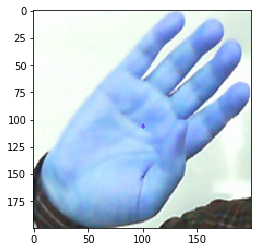

In [11]:
plt.imshow(f_im)

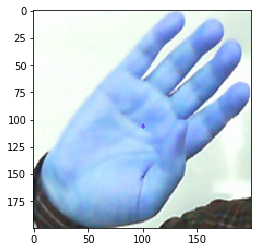

In [12]:
plt.imshow(f_im)

In [13]:
hand_cascade.detectMultiScale(gray, 1.2, 2)

NameError: name 'hand_cascade' is not defined